In [1]:
import gym
from tensorflow import keras
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
import matplotlib.pyplot as plt
#from keras.metrics import AUC

import numpy as np

from env.env import KeibaEnv


# ゲーム環境を作成します
env = KeibaEnv(
    [
        "./../data/train/2003_train_binary.csv",
        "./../data/train/2004_train_binary.csv",
        "./../data/train/2005_train_binary.csv",
        "./../data/train/2006_train_binary.csv",
        "./../data/train/2007_train_binary.csv",
        "./../data/train/2008_train_binary.csv",
        "./../data/train/2009_train_binary.csv",
        "./../data/train/2010_train_binary.csv",
        "./../data/train/2011_train_binary.csv",
        "./../data/train/2012_train_binary.csv",
    ],
    [
        "./../data/train/2003_result_wide.csv",
        "./../data/train/2004_result_wide.csv",
        "./../data/train/2005_result_wide.csv",
        "./../data/train/2006_result_wide.csv",
        "./../data/train/2007_result_wide.csv",
        "./../data/train/2008_result_wide.csv",
        "./../data/train/2009_result_wide.csv",
        "./../data/train/2010_result_wide.csv",
        "./../data/train/2011_result_wide.csv",
        "./../data/train/2012_result_wide.csv",
    ]
)

# ゲーム環境を初期化します。
observation = env.reset()

# 環境からアクション数を取得します。このゲームでは4となります。
nb_actions = env.action_space.n

try:
    model = keras.models.load_model('./../model/binary_model_wide')
except:
    print("create")
    # Kerasを使ってモデルを作成します。
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(1,) + env.observation_space.shape),
        keras.layers.Dense(128, activation="elu"),
        keras.layers.Dense(128, activation='elu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(128, activation='elu'),
        keras.layers.Dense(128, activation='elu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(nb_actions, activation="linear"),
    ])

model.summary()
    
# 経験値を蓄積するためのメモリです。学習を安定させるために使用します。
memory = SequentialMemory(limit=50000, window_length=1)

# 行動ポリシーはBoltzmannQPolicyを使用しています。
# EpsGreedyQPolicyと比較して、こちらの方が収束が早かったので採用しています。
policy = EpsGreedyQPolicy()

# DQNAgentを作成します。
dqn = DQNAgent(
    model=model,
    nb_actions=nb_actions,
    memory=memory,
    target_model_update=1e-2,
    policy=policy)

# DQNAgentのコンパイル。最適化はAdam,評価関数はMAEを使用します。
dqn.compile(Adam(learning_rate=1e-4), metrics=[
    keras.losses.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'), 'accuracy'
])

# 学習開始
history = dqn.fit(env, nb_steps=10000000, visualize=False, log_interval=34462, verbose=1)



RANK_ONE_TWO_HORSE: 0
RANK_ONE_THREE_HORSE: 0
RANK_ONE_FOUR_HORSE: 0
RANK_ONE_FIVE_HORSE: 0
RANK_TWO_THREE_HORSE: 0
RANK_TWO_FOUR_HORSE: 0
RANK_TWO_FIVE_HORSE: 0
RANK_THREE_FOUR_HORSE: 0
RANK_THREE_FIVE_HORSE: 0
RANK_FOUR_FIVE_HORSE: 0
NO_ACITON: 0
TOTAL_REWARD: 0

create
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                          

C:\Users\kazuy\anaconda3\envs\keiba_ai_learning2\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  999/34462 [..............................] - ETA: 3:34 - reward: -0.7918

C:\Users\kazuy\anaconda3\envs\keiba_ai_learning2\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


34462/34462 [==============================] - 336s 10ms/step - reward: -0.1121

RANK_ONE_TWO_HORSE: 1159
RANK_ONE_THREE_HORSE: 650
RANK_ONE_FOUR_HORSE: 1176
RANK_ONE_FIVE_HORSE: 651
RANK_TWO_THREE_HORSE: 754
RANK_TWO_FOUR_HORSE: 714
RANK_TWO_FIVE_HORSE: 607
RANK_THREE_FOUR_HORSE: 551
RANK_THREE_FIVE_HORSE: 582
RANK_FOUR_FIVE_HORSE: 595
NO_ACITON: 27023
TOTAL_REWARD: -2076400

1 episodes - episode_reward: -3864.000 [-3864.000, -3864.000] - loss: 0.438 - binary_crossentropy: 0.518 - accuracy: 0.399 - mean_q: 0.449

Interval 2 (34462 steps performed)
34462/34462 [==============================] - 346s 10ms/step - reward: -0.0507

RANK_ONE_TWO_HORSE: 1268
RANK_ONE_THREE_HORSE: 843
RANK_ONE_FOUR_HORSE: 1104
RANK_ONE_FIVE_HORSE: 788
RANK_TWO_THREE_HORSE: 975
RANK_TWO_FOUR_HORSE: 487
RANK_TWO_FIVE_HORSE: 420
RANK_THREE_FOUR_HORSE: 318
RANK_THREE_FIVE_HORSE: 440
RANK_FOUR_FIVE_HORSE: 440
NO_ACITON: 27379
TOTAL_REWARD: -1041800

1 episodes - episode_reward: -1748.000 [-1748.000, -1748.000] - l

[-3864.0, -1748.0, -1534.0, -1212.0, -1168.0, -926.0, -894.0, -622.0, -682.0, -622.0, -496.0, -584.0, -348.0, -542.0, -526.0, -100.0, -236.0, -272.0, -380.0, -360.0, -172.0, -206.0, 10.0, -200.0, 154.0, -36.0, 134.0, 132.0, 312.0, 374.0, 118.0, 382.0, 246.0, 364.0, 498.0, 332.0, 444.0, 400.0, 576.0, 536.0, 690.0, 638.0, 634.0, 680.0, 552.0, 776.0, 608.0, 676.0, 678.0, 826.0, 852.0, 852.0, 866.0, 1172.0, 782.0, 1036.0, 828.0, 1060.0, 976.0, 944.0, 1056.0, 624.0, 1028.0, 1086.0, 1342.0, 1210.0, 1040.0, 1292.0, 1390.0, 1134.0, 1270.0, 1082.0, 986.0, 924.0, 762.0, 550.0, 322.0, 490.0, 42.0, 212.0, -188.0, -478.0, -2272.0, -3544.0, -2236.0, -1866.0, -1654.0, -926.0, -526.0, -368.0, -464.0, -354.0, -518.0, -246.0, -396.0, 184.0, 364.0, -142.0, 410.0, 662.0, 912.0, 848.0, 1058.0, 1024.0, 1184.0, 1214.0, 1434.0, 1438.0, 1528.0, 1542.0, 1836.0, 1588.0, 1820.0, 1750.0, 1894.0, 2076.0, 2102.0, 2078.0, 2234.0, 2072.0, 2236.0, 2296.0, 1984.0, 2364.0, 2106.0, 2202.0, 2036.0, 2254.0, 2306.0, 2172.0, 

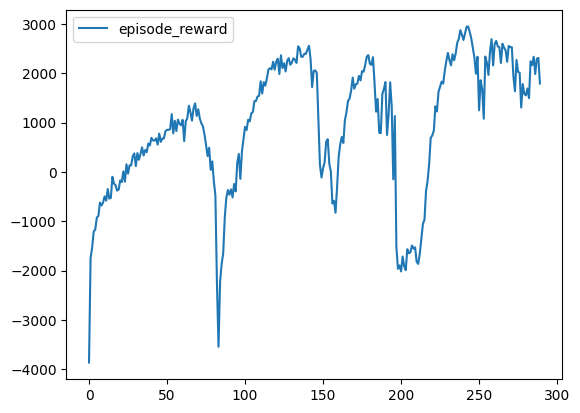

In [3]:
# 学習した重みをファイルに保存します。
#dqn.save_weights('./../model/moving_test.hdf5', overwrite=True)

# 学習したモデルを保存
model.save("./../model/binary_model_wide")
print(history.history['episode_reward'])

# ゲームごとのステップ数と報酬をグラフ化します。
#plt.plot(history.history['nb_episode_steps'], label='nb_episode_steps')
plt.plot(history.history['episode_reward'], label='episode_reward')
plt.legend()
plt.show()